Import the required libraries

In [1]:
import pandas as pd
import numpy as np


Import the data set as a pandas dataframe

In [13]:
data = pd.read_csv("train.csv")
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data-Preprocessing : Filling NaN values, Label Encoding

In [16]:
data = data.fillna(0)

#Mean encoding of columns with 'Object' dtype
data_enc = data
for col in data.columns:
    means = data_enc.groupby(col).SalePrice.mean()
    if (data_enc[col].dtype == 'object'):
        data_enc[col] = data_enc[col].map(means)
data_enc.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,191004.994787,65.0,8450,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,180404.663455,187596.837998,182046.410384,0,2,2008,173401.836622,175202.219533,208500
1,20,191004.994787,80.0,9600,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,177934.574468,...,0,180404.663455,187596.837998,182046.410384,0,5,2007,173401.836622,175202.219533,181500
2,60,191004.994787,68.0,11250,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,176938.047529,...,0,180404.663455,187596.837998,182046.410384,0,9,2008,173401.836622,175202.219533,223500
3,70,191004.994787,60.0,9550,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,181623.425856,...,0,180404.663455,187596.837998,182046.410384,0,2,2006,173401.836622,146526.623762,140000
4,60,191004.994787,84.0,14260,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,177934.574468,...,0,180404.663455,187596.837998,182046.410384,0,12,2008,173401.836622,175202.219533,250000


In [73]:
from sklearn.cross_validation import train_test_split
# Splitting dataset into training and test
y = data_enc['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(data_enc, y, test_size = 0.2)

# Fit the estimator
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators = 500, 
                                loss = 'huber',
                                subsample = 0.5,
                                max_depth = 6, 
                                max_features = 50, 
                                min_samples_leaf = 5, 
                                learning_rate = 0.2)
est.fit(X_train, y_train)

#Predicting Response variable values for test data
y_pred = est.predict(X_test)

# Error on test data
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % rmse)

RMSE: 6974.93


Hyper-parameter tuning through Grid-Search

In [76]:
from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate':[0.1,0.05,0.02,0.01],
              'max_depth':[4,6],
              'min_samples_leaf':[3,5,9,17],
              'max_features':[1.0,0.3,0.1]}

est = GradientBoostingRegressor(n_estimators = 3000)
gs_cv = GridSearchCV(est,param_grid,n_jobs=4).fit(X_train,y_train)

#best hyperparameter setting
gs_cv.best_params_

{'learning_rate': 0.02,
 'max_depth': 6,
 'max_features': 1.0,
 'min_samples_leaf': 3}

Building a Gradient Regressor with parameters obtained through Grid Search

In [77]:
est = GradientBoostingRegressor(n_estimators = 3000, 
                                loss = 'huber',
                                #subsample = 0.5,
                                max_depth = 6, 
                                max_features = 1.0, 
                                min_samples_leaf = 3, 
                                learning_rate = 0.02)
est.fit(X_train, y_train)

#Predicting Response variable values for test data
y_pred = est.predict(X_test)

# Error on test data
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % rmse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.2f' % mae)

RMSE: 1207.22
MAE: 285.00


Plotting feature importance

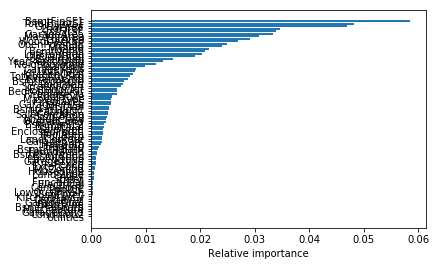

In [119]:
import matplotlib.pyplot as plt
names = list(data)
names = names[:-1]

# sort importances
indices = np.argsort(est.feature_importances_)[:-1]

# plot as bar chart
plt.barh(np.arange(len(names)), est.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')